In [139]:
import math
import os
import random
import shutil
import pickle
import matplotlib.colors
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
# import tensorflow as tf
# import shap
import sys
import time
import sqlite3

from simple_colors import *
from scipy.stats import ttest_ind
from scipy.special import softmax
from sklearn.metrics import accuracy_score
# from tensorflow import keras
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras import layers
# from tensorflow.keras.preprocessing.text import Tokenizer

SEED_VALUE = 11
os.environ['PYTHONHASHSEED']=str(SEED_VALUE)
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
# tf.random.set_seed(SEED_VALUE)
warnings.filterwarnings('ignore')
os.chdir(os.getcwd())

### Contributions: A dataset and an automatic annotation approach

(-0.5, 346.5, 842.5, -0.5)

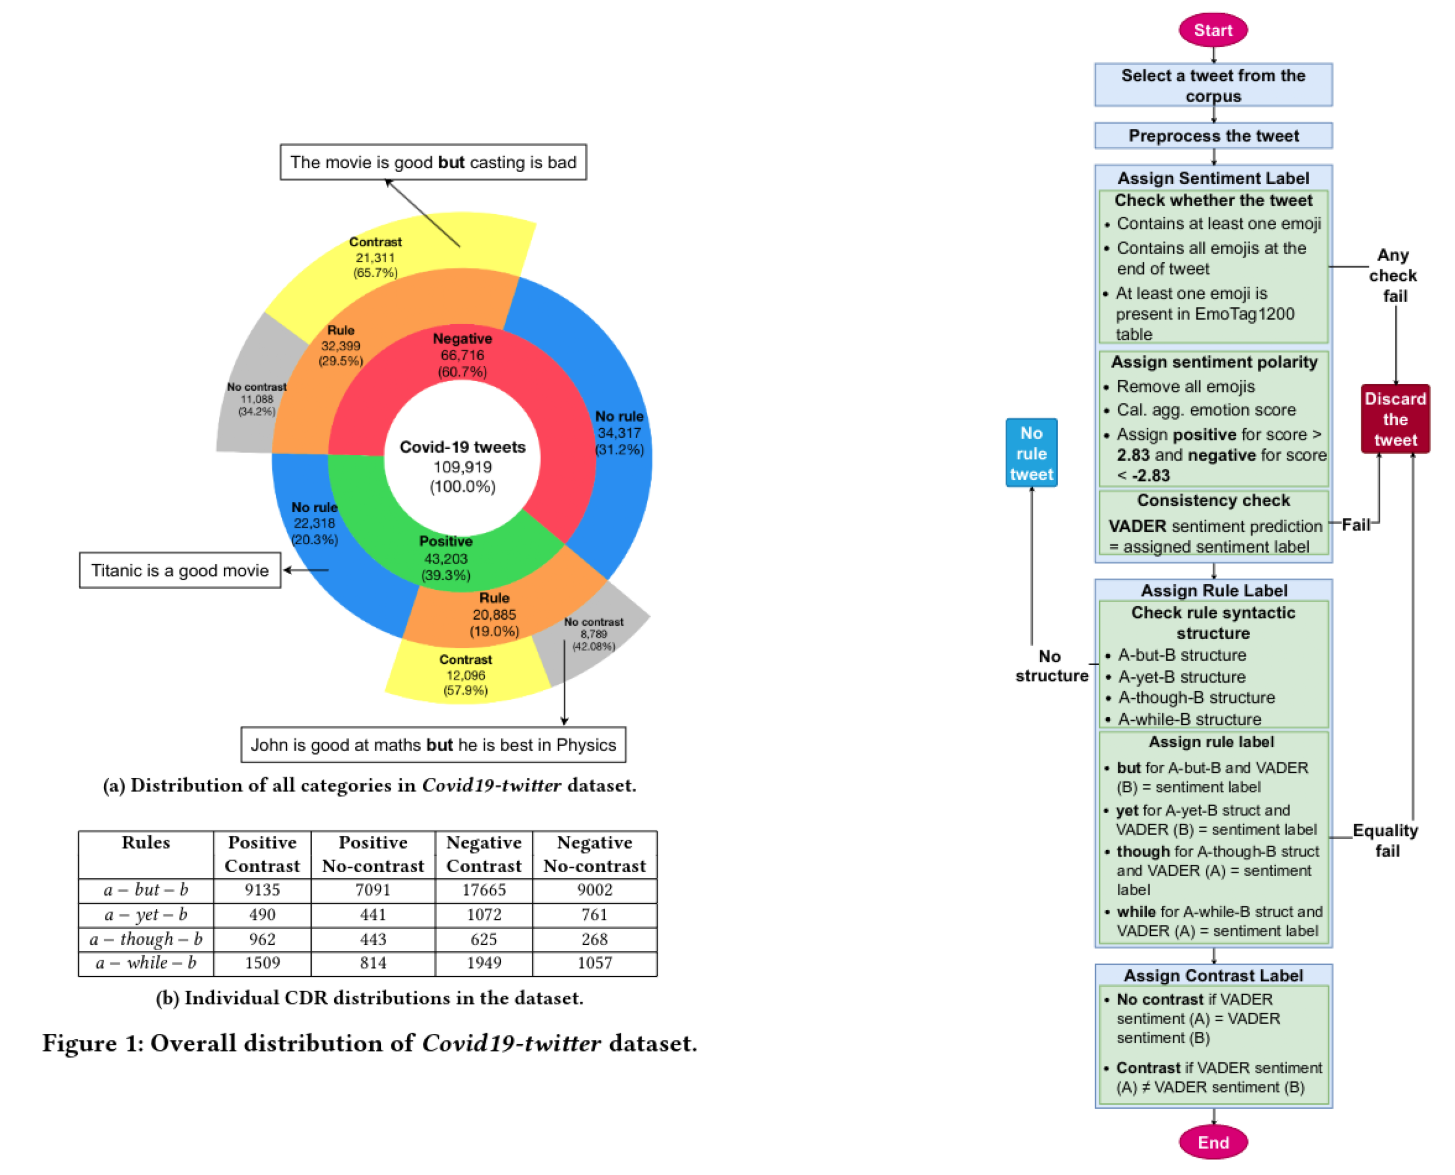

In [211]:
#provide examples for each distribution
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

# figure size in inches optional
rcParams['figure.figsize'] = 20 ,15

# read images
img_A = mpimg.imread('analysis/dataset.png')
img_B = mpimg.imread('analysis/flowchart.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].imshow(img_B)
ax[1].axis('off')

### Benchmarking
#### Proposing the best knowledge dissemination method for each DNN model to construct a sentiment classifier

(-0.5, 801.5, 349.5, -0.5)

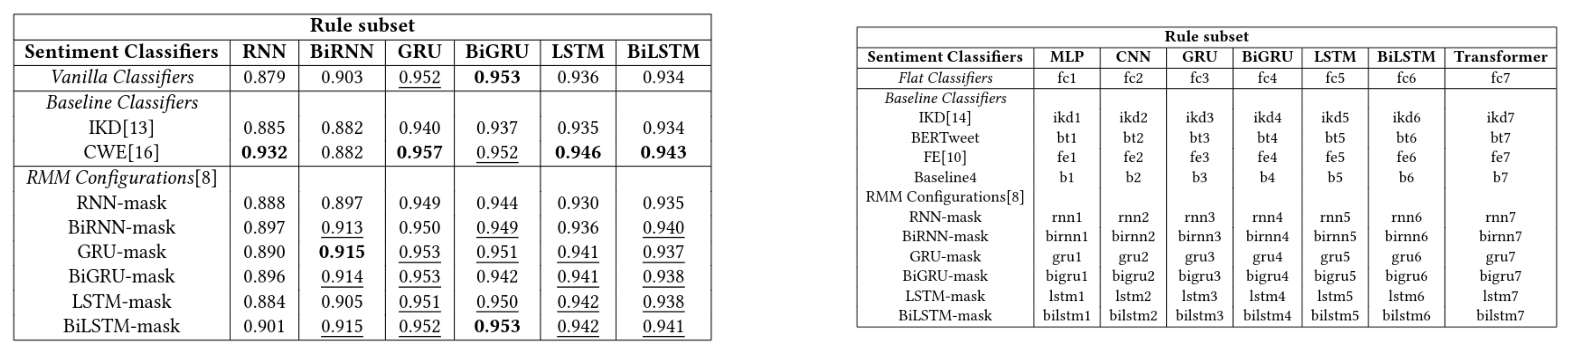

In [214]:
#provide examples for each distribution
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

# figure size in inches optional
rcParams['figure.figsize'] = 20 ,15

# read images
img_A = mpimg.imread('analysis/results_old.png')
img_B = mpimg.imread('analysis/results_new.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[0].axis('off')
ax[1].imshow(img_B)
ax[1].axis('off')

### Metrics

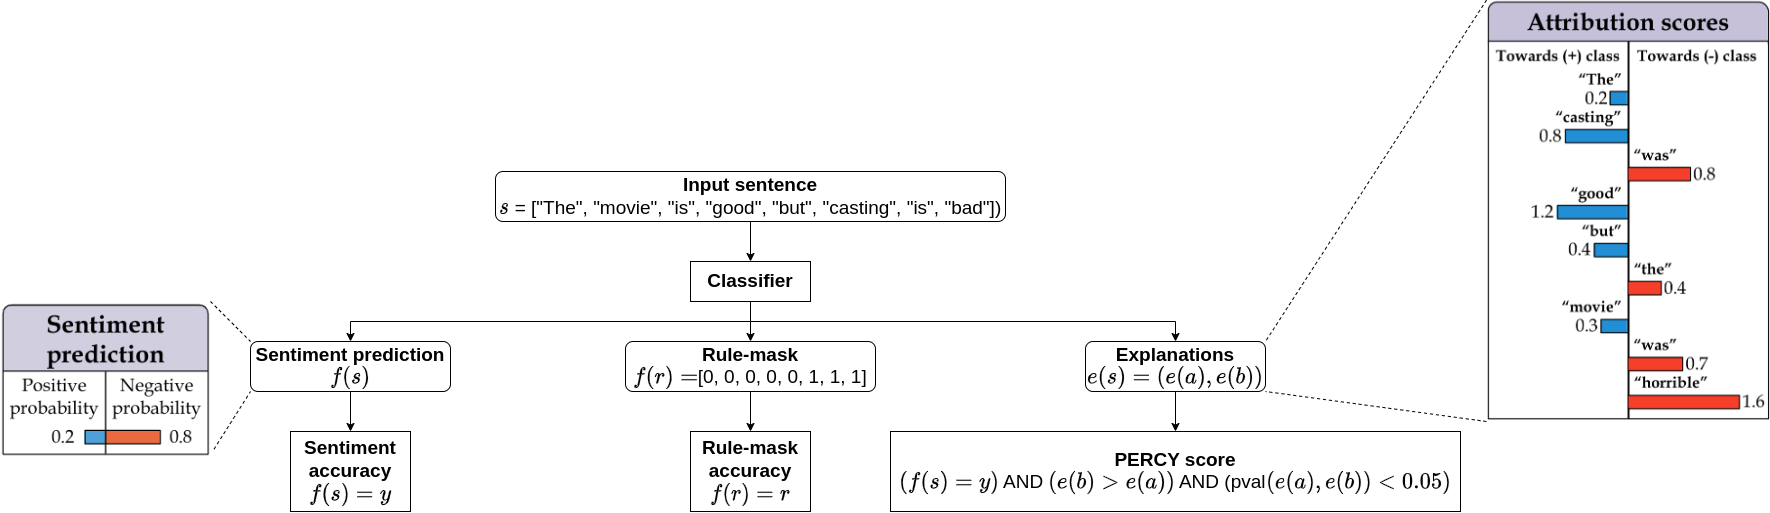

In [215]:
from IPython.display import Image
Image(filename='analysis/metrics.png', width=1000)

### Results

#### Schema of the database as per the results

In [181]:
# #schema 
# """
# Note: there are multiple columns for PERCY score like percy_score, percy_score_same_cond_no_cont, percy_score_without_pval, percy_score_cikm2021
# """
# from IPython.display import Image
# Image(filename='analysis/schema.png')
# #improve the quality of image

#### Creating the database as per the schema

In [7]:
##TO-DO: Avoid loading the tensorflow to make this code run quicker
import sqlite3
from analysis.create_database import create_database

#Replace classifiers with <None> value
input_dict = {
            "flat_classifiers":FLAT_CLASSIFIERS,
            "ikd":None,
            "cwe":CWE,
            "fe":None,
            "mask_models":None
             }
create_database(input_dict).creating_database_one_rule()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1023.50it/s]


mlp_1e-6LearningRate_200Epochs_0.5Dropout already exists in the database

cnn_1e5_learning_rate_200_epochs already exists in the database

lstm_1e5_learning_rate_200_epochs already exists in the database

bilstm_1e5_learning_rate_200_epochs already exists in the database

gru_1e5_learning_rate_200_epochs already exists in the database

bigru_1e5_learning_rate_200_epochs already exists in the database

transformer_1e-6LearningRate_200Epochs_0.5Dropout_2Heads_LimeExpFixed already exists in the database



  0%|                                                                                                                                                                                                                                                                                                   | 0/3 [00:00<?, ?it/s]Traceback (most recent call last):
  File "/home/guptashas/.conda/envs/env_python_3.9_tensorflow/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3790, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'contrast'

The above exception was the direct cause of the following exception

IkdCnn_BalancedCovTwitterData_Prototype
IkdCnn_Sst2_Prototype
IkdCnn_Covid19TwitterRulesBalanced


  0%|                                                                                                                                                                                                                                                                                                   | 0/5 [00:00<?, ?it/s]

gpt2_mlp already exists in the database

gpt2_lstm already exists in the database

gpt2_bilstm


Traceback (most recent call last):
  File "/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/create_database.py", line 210, in creating_database_one_rule
    with open("cwe/assets/lime_explanations/"+model+".pickle", 'rb') as handle:
FileNotFoundError: [Errno 2] No such file or directory: 'cwe/assets/lime_explanations/gpt2_bilstm.pickle'
 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                 | 3/5 [00:00<00:00,  7.95it/s]Traceback (most recent call last):
  File "/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/create_database.py", line 210, in creating_database_one_rule
    with open("cwe/assets/lime_explanations/"+model+".pickle", 'rb') as handle:
FileNotFoundError: [Errno 2] No such file or directory: 'cwe/assets/lime_explana

gpt2_gru
gpt2_bigru already exists in the database




Traceback (most recent call last):
  File "/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/create_database.py", line 237, in creating_database_one_rule
    fe = [f.replace('.h5', '') for f in listdir("base_model_FE/assets/trained_models/") if isfile(join("base_model_FE/assets/trained_models/", f))]
FileNotFoundError: [Errno 2] No such file or directory: 'base_model_FE/assets/trained_models/'
Traceback (most recent call last):
  File "/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/create_database.py", line 325, in creating_database_one_rule
    mask_models = [f.replace('.h5', '') for f in listdir("mask_model/assets/trained_models/") if isfile(join("mask_model/assets/trained_models/", f))]
FileNotFoundError: [Errno 2] No such file or directory: 'mask_model/assets/trained_models/'


#### Query distrubitions of the metrics from the database

In [8]:
#### DNN models ####
DNN_MODELS = [
             "mlp",
             "cnn",
             "lstm", 
             "bilstm", 
             "gru", 
             "bigru",
             "transformer"
             ]

##### Sentiment classifiers #####
#flat classifiers
FLAT_CLASSIFIERS = [
#              "mlp",
#              "mlp_1e5_learning_rate",
#              "mlp_1e5_learning_rate_200_epochs",
#              "mlp_1e5_learning_rate_200_epochs_64_units",
#              "mlp_1e5_learning_rate_200_epochs_32_units",
#              "mlp_1e5_learning_rate_200_epochs_8_units",
# #              "mlp_1e5_learning_rate_200_epochs_hyptuning_on_val_loss_dropout",
#               "mlp_1e5LearningRate_200Epochs_0.3Dropout",
# # #              "mlp_200Epochs_HyperparametersTuningOnValLoss",
#               "mlp_1e5LearningRate_200Epochs_0.2Dropout",
#               "mlp_1e5LearningRate_200Epochs_DropoutTuningOnValLoss",
#               "mlp_1e5LearningRate_200Epochs_0.7Dropout",
              "mlp_1e-6LearningRate_200Epochs_0.5Dropout",
# # #              "cnn",
             "cnn_1e5_learning_rate_200_epochs",
# #                 "cnn_1e5LearningRate_1000Epochs",
# #             "cnn_1e-6LearningRate_200Epochs_0.5Dropout",
# # #              "lstm",
                 "lstm_1e5_learning_rate_200_epochs",
# #             "lstm_1e5LearningRate_1000Epochs",
# #             "lstm_1e-6LearningRate_200Epochs_0.5Dropout",
# #             "lstm_2e-6LearningRate_200Epochs_0.5Dropout",
# #             "lstm_4e-6LearningRate_200Epochs_0.5Dropout",
# #             "lstm_6e-6LearningRate_200Epochs_0.5Dropout",
             "bilstm_1e5_learning_rate_200_epochs",
# #              "bilstm",
# #               "bilstm_1e5LearningRate_1000Epochs",
# #             "bilstm_1e-6LearningRate_200Epochs_0.5Dropout",
# # #              "gru",
             "gru_1e5_learning_rate_200_epochs",
# #             "gru_1e5LearningRate_1000Epochs",
# #             "gru_1e-6LearningRate_200Epochs_0.5Dropout",
# # #              "bigru",
             "bigru_1e5_learning_rate_200_epochs",
#              "bigru_1e5LearningRate_1000Epochs",
#             "bigru_1e5LearningRate_1000Epochs",
#             "bigru_1e-6LearningRate_200Epochs_0.5Dropout",
#             "transformer",
#             "transformer_higher_learning_rate",
#             "transformer_lower_learning_rate",
#             "transformer_1e6_learning_rate",
#             "transformer_1e5_learning_rate_300_epochs",
#             "transformer_1e5_learning_rate_200_epochs",
#             "transformer_1e5LearningRate_200Epochs_EmbeddingMask",
#             "transformer_1e5_learning_rate_200_epochs",
#             "transformers_1e5_learning_rate_200_epochs_6_heads",
#             "transformer_1e5LearningRate_200Epochs_0.1Dropout_2Heads_AddedDenseLayerInOutput",
#             "transformer_1e5LearningRate_200Epochs_0.7Dropout_EmbeddingMaskTrue",
#              "transformer_1e5LearningRate_200Epochs_0.5Dropout_2Heads_RemovedDenseLayerInOutput_EmbeddingMaskTrue",
#              "transformer_1e-5LearningRate_200Epochs_0.9Dropout_2Heads_RemovedDenseLayerInOutput_EmbeddingMaskTrue",
#              "transformer_1e-7LearningRate_200Epochs_0.5Dropout_2Heads_RemovedDenseLayerInOutput_EmbeddingMaskTrue",
#              "transformer_1e-6LearningRate_200Epochs_0.5Dropout_2Heads_RemovedDenseLayerInOutput_EmbeddingMaskTrue",
#              "transformer_1e-6LearningRate_200Epochs_0.5Dropout_4Heads_RemovedDenseLayerInOutput_EmbeddingMaskTrue",
#              "transformer_1e-6LearningRate_200Epochs_0.5Dropout_6Heads_RemovedDenseLayerInOutput_EmbeddingMaskTrue",
             "transformer_1e-6LearningRate_200Epochs_0.5Dropout_2Heads_LimeExpFixed"
             ]

#baseline classifiers
CWE = [
#         "bertweet_mlp",
#         "bertweet_mlp_DropoutAddedInMlp",
# #         "bertweet_cnn",
#         "bertweet_lstm",
#         "bertweet_bilstm",
#         "bertweet_gru",
#         "bertweet_bigru",
#         "bertweet_transformer",
        "gpt2_mlp",
        "gpt2_lstm",
        "gpt2_bilstm",
        "gpt2_gru",
        "gpt2_bigru",
        "gpt2_transformer"
      ]
IKD = [
       "rnn_model-IKD-PAD_MASK_ZERO", 
       "birnn_model-IKD-PAD_MASK_ZERO",
       "gru_model-IKD-PAD_MASK_ZERO",
       "bigru_model-IKD-PAD_MASK_ZERO", 
       "lstm_model-IKD-PAD_MASK_ZERO", 
       "bilstm_model-IKD-PAD_MASK_ZERO"
      ]
FE = [
      "rnn_FE_model-MODEL_MODIFIED_FOR_PERCY_CALCULATION-TRAINED_ON_SERVER",
      "birnn_FE_model-MODEL_MODIFIED_FOR_PERCY_CALCULATION-TRAINED_ON_SERVER",
      "gru_FE_model-MODEL_MODIFIED_FOR_PERCY_CALCULATION-TRAINED_ON_SERVER", 
      "bigru_FE_model-MODEL_MODIFIED_FOR_PERCY_CALCULATION-TRAINED_ON_SERVER", 
      "lstm_FE_model-MODEL_MODIFIED_FOR_PERCY_CALCULATION-TRAINED_ON_SERVER", 
      "bilstm_FE_model-MODEL_MODIFIED_FOR_PERCY_CALCULATION-TRAINED_ON_SERVER"
     ]

#RMM configurations
mask_models = []
masks = [
        "rnn", 
        "birnn", 
        "gru", 
        "bigru", 
        "lstm", 
        "bilstm"
        ]    
for mask in masks:
    MODELS = [
              "rnn_"+mask+"_mask_model-MASK_OUTPUT_CORRECTED-TRAINED_ON_SERVER",
              "birnn_"+mask+"_mask_model-MASK_OUTPUT_CORRECTED-TRAINED_ON_SERVER",
              "gru_"+mask+"_mask_model-MASK_OUTPUT_CORRECTED-TRAINED_ON_SERVER", 
              "bigru_"+mask+"_mask_model-MASK_OUTPUT_CORRECTED-TRAINED_ON_SERVER", 
              "lstm_"+mask+"_mask_model-MASK_OUTPUT_CORRECTED-TRAINED_ON_SERVER", 
              "bilstm_"+mask+"_mask_model-MASK_OUTPUT_CORRECTED-TRAINED_ON_SERVER"
             ]
#     MODELS = [
#               "rnn_"+mask+"_mask_model-CLIPPED_MASK",
#               "birnn_"+mask+"_mask_model-CLIPPED_MASK",
#               "gru_"+mask+"_mask_model-CLIPPED_MASK", 
#               "bigru_"+mask+"_mask_model-CLIPPED_MASK", 
#               "lstm_"+mask+"_mask_model-CLIPPED_MASK", 
#               "bilstm_"+mask+"_mask_model-CLIPPED_MASK"
#              ]
    mask_models.append(MODELS)

In [11]:
##TO-DO: it should return the classifiers corresponding to the values as well

from analysis.query_distributions import query_distributions

#Replace classifiers with <None> value
input_dict = {
            "flat_classifiers":None,
            "ikd":None,
            "cwe":CWE,
            "fe":None,
            "mask_models":None
             }
sentiment_accuracy_dists, sentiment_accuracy_vals, percy_score_dists, percy_score_vals = query_distributions(input_dict).query()

gpt2_bilstm
gpt2_gru
gpt2_bilstm
gpt2_gru


Traceback (most recent call last):
  File "/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/query_distributions.py", line 25, in fetch_vals_and_dists_for_metric
    dist = row[0]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/query_distributions.py", line 25, in fetch_vals_and_dists_for_metric
    dist = row[0]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/query_distributions.py", line 25, in fetch_vals_and_dists_for_metric
    dist = row[0]
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/query_distributions.py", line 25, in fetch_vals_and_dists_for_metric
    dist = row[0]
TypeError: 'NoneType' object is not subscriptable


In [12]:
sentiment_accuracy_vals, percy_score_vals

([[0.9617602808425276, 0.9648946840521565, 0.9661484453360081]],
 [[0.10354916677267523, 0.09782470423610228, 0.09731586312174023]])

### Analysis

#### Tabular visualisation of the results as per their structure

In [35]:
from analysis.tabular_visualisation import create_tabular_visualisation

#creating the first column
data = {
"Sentiment classifiers":[
"Flat classifiers", 
#     "IKD (2016)", 
#     "CWE (2018)", 
#     "FE (2021)",
#     "RNN-mask", "BiRNN-mask", "GRU-mask", "BiGRU-mask", "LSTM-mask", "BiLSTM-mask"
]
}

dataframe_accuracy = create_tabular_visualisation(data, DNN_MODELS, "sentiment_accuracy", 
                                                  sentiment_accuracy_vals, sentiment_accuracy_dists)
dataframe_percy = create_tabular_visualisation(data, DNN_MODELS, "percy_score", 
                                               percy_score_vals, percy_score_dists)

/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/tabular_visualisation.py:74: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  dataframe = dataframe.style.applymap(highlight, subset=pd.IndexSlice[:, [dnn_models[0]]], column_name=dnn_models[0], vals_column_dict=vals_column_dict)\
/home/guptashas/experiments/covid_19_twitter_SIGIR2024/analysis/tabular_visualisation.py:74: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  dataframe = dataframe.style.applymap(highlight, subset=pd.IndexSlice[:, [dnn_models[0]]], column_name=dnn_models[0], vals_column_dict=vals_column_dict)\


In [36]:
#Provide a small description of the tables
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>']))):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        if ' \n ' in title:
            titles = title.split(' \n ')
            for title in titles:
                html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        else:
            html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
display_side_by_side(dataframe_accuracy,
                     titles=['Sentiment accuracy'])
display_side_by_side(dataframe_percy,
                     titles=['PERCY score'])

,Sentiment classifiers,mlp,cnn,lstm,bilstm,gru,bigru,transformer
0,Flat classifiers,0.835757,0.933425,0.923521,0.924273,0.929664,0.935055,0.889418


,Sentiment classifiers,mlp,cnn,lstm,bilstm,gru,bigru,transformer
0,Flat classifiers,0.024552,0.077344,0.063732,0.078743,0.092100,0.081287,0.057753


#### Bar plots visualisation of the results as per their structure

#### Convergence plots

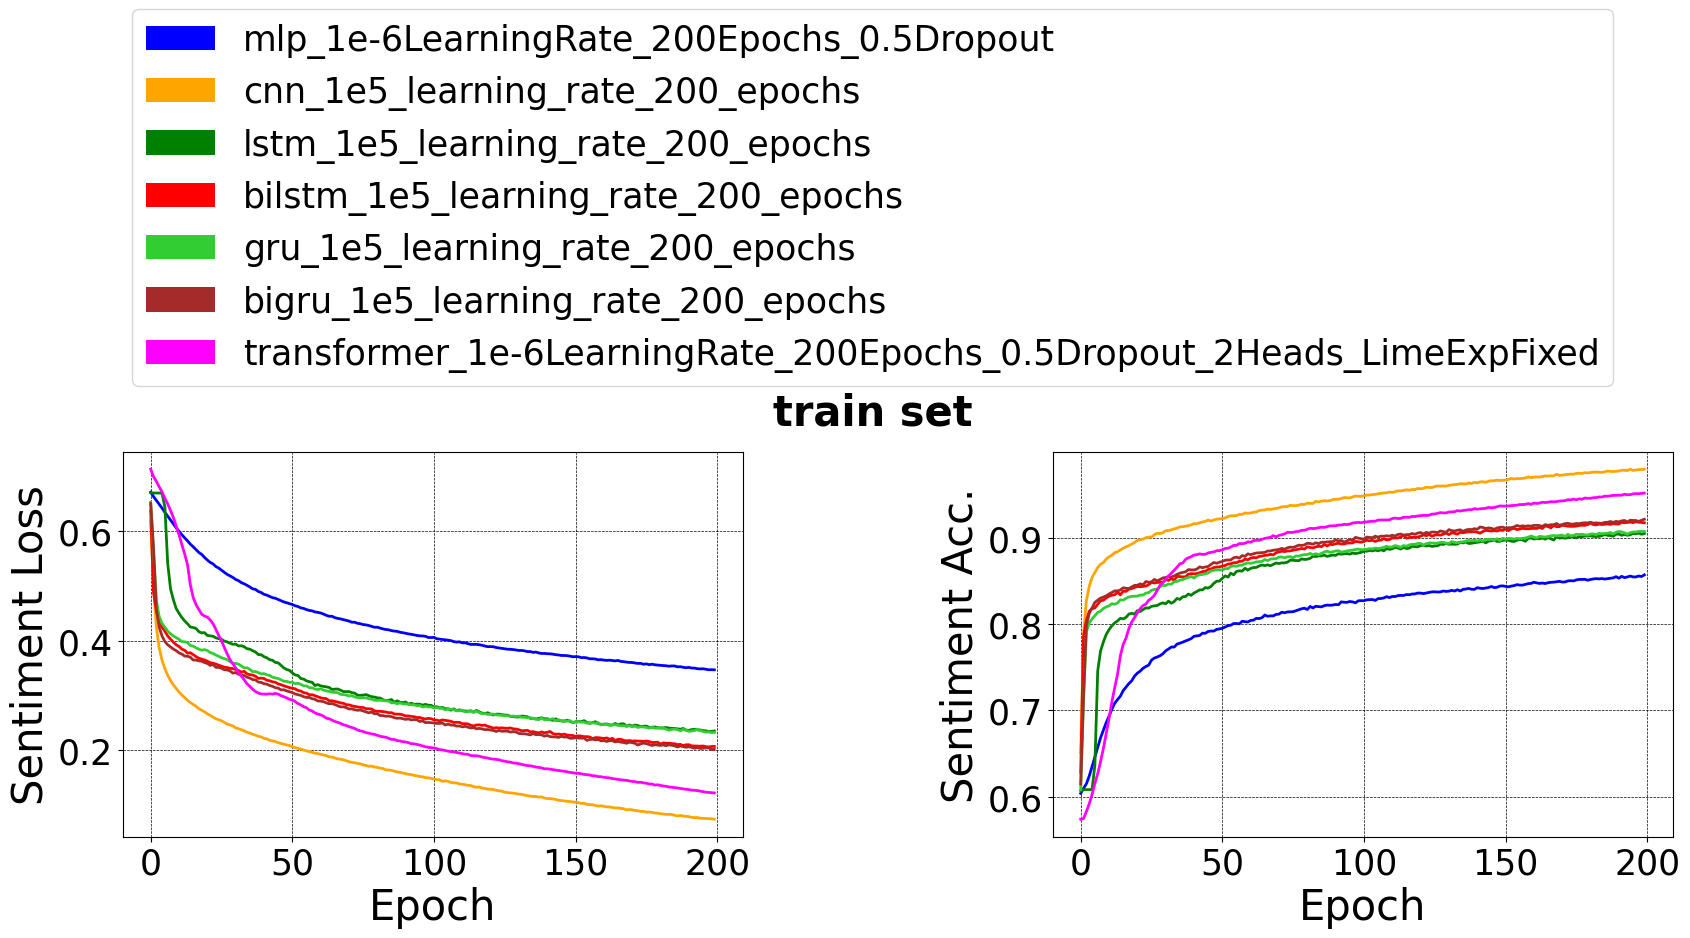

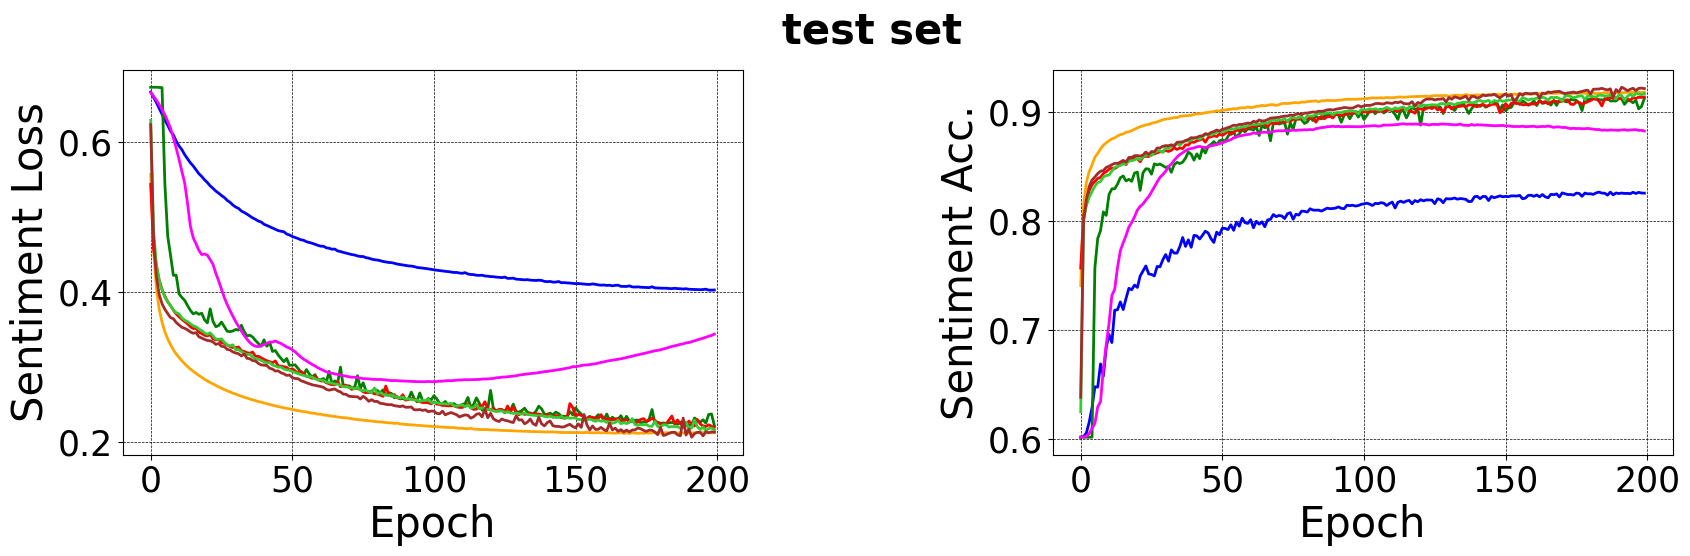

In [38]:
##### Convergence plots #####
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle

#Smoothening
def smooth(scalars, weight = 0.0):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
    return smoothed

#Graph parameters
params = {'figure.titlesize':30,
          'legend.fontsize': 25,
          'font.size': 25,
          'axes.labelsize': 30,
          'axes.titlesize':30,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'axes.titlepad': 25,
          'axes.axisbelow': True}
plt.rcParams.update(params)

#Models
MODELS = FLAT_CLASSIFIERS
# fig_legend, ax_legend = plt.subplots(figsize=(20,5))
fig_train, ax_train = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={"wspace":0.5})
fig_test, ax_test = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={"wspace":0.5})
ax_train[0].grid(color = 'black', linestyle = '--', linewidth = 0.5)
ax_train[1].grid(color = 'black', linestyle = '--', linewidth = 0.5)
ax_test[0].grid(color = 'black', linestyle = '--', linewidth = 0.5)
ax_test[1].grid(color = 'black', linestyle = '--', linewidth = 0.5)

colors = ["blue", "orange", "green", "red", "limegreen", "brown", "magenta", "red", "limegreen", "brown", "magenta"]
colors = colors + colors
legends = MODELS

for index_2, model in enumerate(MODELS):
    color = colors[index_2]
    try:
        with open("flat_classifiers/assets/training_history/"+model+".pickle", 'rb') as handle:
            history = pickle.load(handle)
    except:
        with open("cwe/assets/training_history/"+model+".pickle", 'rb') as handle:
            history = pickle.load(handle)
    
    history['train_dataset_loss_smoothed'] = smooth(history['loss'])
    history['train_dataset_accuracy_smoothed'] = smooth(history['accuracy'])
    history['test_dataset_loss_smoothed'] = smooth(history['test_dataset_loss'])
    history['test_dataset_accuracy_smoothed'] = smooth(history['test_dataset_accuracy'])
    
    ax_train[0].plot(history['train_dataset_loss_smoothed'], color=color, linewidth=2, label=model)
    ax_train[1].plot(history['train_dataset_accuracy_smoothed'], color=color, linewidth=2, label=model)
    ax_test[0].plot(history['test_dataset_loss_smoothed'], color=color, linewidth=2, label=model)
    ax_test[1].plot(history['test_dataset_accuracy_smoothed'], color=color, linewidth=2, label=model)

    
fig_train.suptitle("train set", x=0.5, y=1.0, weight="bold")
ax_train[0].set_xlabel('Epoch')
ax_train[0].set_ylabel('Sentiment Loss')
ax_train[1].set_xlabel('Epoch')
ax_train[1].set_ylabel('Sentiment Acc.')

fig_test.suptitle("test set", x=0.5, y=1.0, weight="bold")
ax_test[0].set_xlabel('Epoch')
ax_test[0].set_ylabel('Sentiment Loss')
ax_test[1].set_xlabel('Epoch')
ax_test[1].set_ylabel('Sentiment Acc.')

recs = []
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0), 1, 1, fc=colors[i]))
fig_train.legend(recs, legends, loc='upper center', bbox_to_anchor=(0.5, 1.8))

# #RMM configurations
# fig_rmm, ax_rmm = plt.subplots(figsize=(35, 7))
# ax_rmm.grid(color = 'black', linestyle = '--', linewidth = 0.5)
# for index, model in enumerate(FLAT_CLASSIFIERS):
#     colors = ["blue", "orange", "green", "red", "limegreen", "brown", "magenta", "grey"]
#     for index_2, model in enumerate(mask_model):
#         color = colors[index_2]
#         with open("mask_model/assets/training_history/"+model+".pickle", 'rb') as handle:
#             history = pickle.load(handle)
#         history['test_dataset_one_rule_mask_accuracy_smoothed'] = smooth(history['test_dataset_one_rule_mask_accuracy'])
#         ax_rmm.plot(history['test_dataset_one_rule_mask_accuracy_smoothed'], color=color, linewidth=4)
# ax_rmm.set_title('RMM classifiers')
# ax_rmm.set_xlabel('Train epoch')
# ax_rmm.set_ylabel('Rule-mask Acc.')

### End ###

#### Tests for the scripts used in this notebook ####

In [98]:
import tensorflow as tf

# Compute some values using a Tensor
c = tf.constant([[0.3, 0.7], [0.1, 0.9], [0.5, 0.5]])
print(c)

In [7]:
import sqlite3

con = sqlite3.connect("one_rule.db")
cur = con.cursor()
columns = """(classifiers, 
            sentiment_accuracy, 
            percy_score, percy_score_same_cond_no_cont, percy_score_without_pval, percy_score_cikm2021,
            rule_mask_accuracy_vector_comparison, rule_mask_accuracy_bitwise_comparison, UNIQUE(classifiers))
          """
query = "CREATE TABLE IF NOT EXISTS one_rule"+columns
cur.execute(query)

for model in BASE_MODELS:
    print(model)
    cur.execute("SELECT * FROM one_rule WHERE classifiers = ?", (model,))
    data=cur.fetchone()
    if data is None:
        print('There is no component named %s'%model)
    else:
        print('Component %s found with rowid %s'%(model,data[0]))

rnn_model
Component rnn_model found with rowid rnn_model
birnn_model_256_hidden_units
Component birnn_model_256_hidden_units found with rowid birnn_model_256_hidden_units
gru_model-128_HIDDEN_UNITS
Component gru_model-128_HIDDEN_UNITS found with rowid gru_model-128_HIDDEN_UNITS
bigru_model-128_HIDDEN_UNITS
Component bigru_model-128_HIDDEN_UNITS found with rowid bigru_model-128_HIDDEN_UNITS
lstm_model-128_HIDDEN_UNITS
Component lstm_model-128_HIDDEN_UNITS found with rowid lstm_model-128_HIDDEN_UNITS
bilstm_model-128_HIDDEN_UNITS
Component bilstm_model-128_HIDDEN_UNITS found with rowid bilstm_model-128_HIDDEN_UNITS


In [66]:
sentence = """
@bbcburnsy @swanster66 @mattdeanbbc @HumbersideSport No crowd noise didn't matter - listening to you two today felt "normal" and sounded normal, with two old friends back on Saturday Sport once more gave a Covid release just for a couple of hours despite the rubbish result 👏👏👏
"""

In [67]:
# from nltk.tokenize import TweetTokenizer

# tokenizer = TweetTokenizer()
# tokenized_sentence = tokenizer.tokenize(sentence)
# tokenized_sentence

In [68]:
# from nltk.tokenize.treebank import TreebankWordDetokenizer
# TreebankWordDetokenizer().detokenize(tokenized_sentence)

In [69]:
sentence

'\n@bbcburnsy @swanster66 @mattdeanbbc @HumbersideSport No crowd noise didn\'t matter - listening to you two today felt "normal" and sounded normal, with two old friends back on Saturday Sport once more gave a Covid release just for a couple of hours despite the rubbish result 👏👏👏\n'

In [70]:
tokenized_sentence = sentence.lower().split()
tokenized_sentence

['@bbcburnsy',
 '@swanster66',
 '@mattdeanbbc',
 '@humbersidesport',
 'no',
 'crowd',
 'noise',
 "didn't",
 'matter',
 '-',
 'listening',
 'to',
 'you',
 'two',
 'today',
 'felt',
 '"normal"',
 'and',
 'sounded',
 'normal,',
 'with',
 'two',
 'old',
 'friends',
 'back',
 'on',
 'saturday',
 'sport',
 'once',
 'more',
 'gave',
 'a',
 'covid',
 'release',
 'just',
 'for',
 'a',
 'couple',
 'of',
 'hours',
 'despite',
 'the',
 'rubbish',
 'result',
 '👏👏👏']

In [71]:
tokenized_sentence_upper = sentence.split()
tokenized_sentence_upper

['@bbcburnsy',
 '@swanster66',
 '@mattdeanbbc',
 '@HumbersideSport',
 'No',
 'crowd',
 'noise',
 "didn't",
 'matter',
 '-',
 'listening',
 'to',
 'you',
 'two',
 'today',
 'felt',
 '"normal"',
 'and',
 'sounded',
 'normal,',
 'with',
 'two',
 'old',
 'friends',
 'back',
 'on',
 'Saturday',
 'Sport',
 'once',
 'more',
 'gave',
 'a',
 'Covid',
 'release',
 'just',
 'for',
 'a',
 'couple',
 'of',
 'hours',
 'despite',
 'the',
 'rubbish',
 'result',
 '👏👏👏']

In [72]:
a_clause = tokenized_sentence_upper[:tokenized_sentence.index("despite")]
a_clause = ' '.join(a_clause)
b_clause = tokenized_sentence_upper[tokenized_sentence.index("despite")+1:]
b_clause = ' '.join(b_clause)
print(a_clause)
print(b_clause)

@bbcburnsy @swanster66 @mattdeanbbc @HumbersideSport No crowd noise didn't matter - listening to you two today felt "normal" and sounded normal, with two old friends back on Saturday Sport once more gave a Covid release just for a couple of hours
the rubbish result 👏👏👏


In [73]:
re_sentence = ' '.join(tokenized_sentence)
re_sentence = re_sentence.strip().replace('  ', ' ')
re_sentence

'@bbcburnsy @swanster66 @mattdeanbbc @humbersidesport no crowd noise didn\'t matter - listening to you two today felt "normal" and sounded normal, with two old friends back on saturday sport once more gave a covid release just for a couple of hours despite the rubbish result 👏👏👏'

In [145]:
from nltk.tokenize import TweetTokenizer

def conjunction_analysis(tweet):

    #lowercase and tokenize the sentence
    tokenized_sentence = tweet.lower().split()
    tokenized_sentence_orig_case = tweet.split()

    # tweet_lower_case = tweet.lower()
    # tokenizer = TweetTokenizer()
    # tokenized_sentence = tokenizer.tokenize(tweet_lower_case)

    #output
    rule_structure = None
    rule_conjunct = None
    a_conjunct = None
    b_conjunct = None

    #markers list
    marker_list = [
                    "but",
                    "yet",
                    "though",
                    "while",
                    "however",
                    "despite",
                    "though",
                    "although",
                    "nevertheless",
                    "otherwise",
                    "still",
                    "nonetheless",
                    "till",
                    "until",
                    "in spite"
                  ]

    # A-but-B
    word_list = marker_list.copy()
    word_list.remove("but")
    if ('but' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('but') != 0 and tokenized_sentence.index('but') != -1 and tokenized_sentence.count('but') == 1): # Check if the sentence contains A-but-B structure
            rule_structure = "a-but-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("but")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("but")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')
    
    # A-while-B
    word_list = marker_list.copy()
    word_list.remove("while")
    if ('while' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('while') != 0 and tokenized_sentence.index('while') != -1 and tokenized_sentence.count('while') == 1):
            rule_structure = "a-while-b"
            rule_conjunct = "a"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("while")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("while")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-yet-B
    word_list = marker_list.copy()
    word_list.remove("yet")
    if ('yet' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('yet') != 0 and tokenized_sentence.index('yet') != -1 and tokenized_sentence.count('yet') == 1): # Check if the sentence contains A-yet-B structure
            rule_structure = "a-yet-b"
            rule_conjunct = "b"   

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("yet")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("yet")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-however-B
    word_list = marker_list.copy()
    word_list.remove("however")
    if ('however' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('however') != 0 and tokenized_sentence.index('however') != -1 and tokenized_sentence.count('however') == 1):
            rule_structure = "a-however-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("however")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("however")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-despite-B
    word_list = marker_list.copy()
    word_list.remove("despite")
    if ('despite' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('despite') != 0 and tokenized_sentence.index('despite') != -1 and tokenized_sentence.count('despite') == 1):
            rule_structure = "a-despite-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("despite")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("despite")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-although-B
    word_list = marker_list.copy()
    word_list.remove("although")
    if ('although' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('although') != 0 and tokenized_sentence.index('although') != -1 and tokenized_sentence.count('although') == 1):
            rule_structure = "a-although-b"
            rule_conjunct = "a"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("although")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("although")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-though-B
    word_list = marker_list.copy()
    word_list.remove("though")
    if ('though' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('though') != 0 and tokenized_sentence.index('though') != -1 and tokenized_sentence.count('though') == 1):
            rule_structure = "a-though-b"
            rule_conjunct = "a"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("though")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("though")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-nevertheless-B
    word_list = marker_list.copy()
    word_list.remove("nevertheless")
    if ('nevertheless' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('nevertheless') != 0 and tokenized_sentence.index('nevertheless') != -1 and tokenized_sentence.count('nevertheless') == 1):
            rule_structure = "a-nevertheless-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("nevertheless")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("nevertheless")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-otherwise-B
    word_list = marker_list.copy()
    word_list.remove("otherwise")
    if ('otherwise' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('otherwise') != 0 and tokenized_sentence.index('otherwise') != -1 and tokenized_sentence.count('otherwise') == 1):
            rule_structure = "a-otherwise-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("otherwise")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("otherwise")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-still-B
    word_list = marker_list.copy()
    word_list.remove("still")
    if ('still' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('still') != 0 and tokenized_sentence.index('still') != -1 and tokenized_sentence.count('still') == 1):
            rule_structure = "a-still-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("still")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("still")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-nonetheless-B
    word_list = marker_list.copy()
    word_list.remove("nonetheless")
    if ('nonetheless' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('nonetheless') != 0 and tokenized_sentence.index('nonetheless') != -1 and tokenized_sentence.count('nonetheless') == 1):
            rule_structure = "a-nonetheless-b"
            rule_conjunct = "b"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("nonetheless")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("nonetheless")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-till-B
    word_list = marker_list.copy()
    word_list.remove("till")
    if ('till' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('till') != 0 and tokenized_sentence.index('till') != -1 and tokenized_sentence.count('till') == 1):
            rule_structure = "a-till-a"
            rule_conjunct = "a"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("till")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("till")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')
    
    # A-until-B
    word_list = marker_list.copy()
    word_list.remove("until")
    if ('until' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('until') != 0 and tokenized_sentence.index('until') != -1 and tokenized_sentence.count('until') == 1):
            rule_structure = "a-until-b"
            rule_conjunct = "a"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("until")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("until")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    # A-in spite-B
    word_list = marker_list.copy()
    word_list.remove("in spite")
    if ('in spite' in tokenized_sentence and not any(word in tokenized_sentence for word in word_list)):
        if (tokenized_sentence.index('in spite') != 0 and tokenized_sentence.index('in spite') != -1 and tokenized_sentence.count('in spite') == 1):
            rule_structure = "a-in spite-b"
            rule_conjunct = "a"

            a_conjunct = tokenized_sentence_orig_case[:tokenized_sentence.index("in spite")]
            b_conjunct = tokenized_sentence_orig_case[tokenized_sentence.index("in spite")+1:]

            a_conjunct = ' '.join(a_conjunct)
            b_conjunct = ' '.join(b_conjunct)

            a_conjunct = a_conjunct.strip().replace('  ', ' ')
            b_conjunct = b_conjunct.strip().replace('  ', ' ')

    return rule_structure, rule_conjunct, a_conjunct, b_conjunct

import preprocessor as p
p.set_options(p.OPT.EMOJI, p.OPT.SMILEY)
tweet = """
        This thing my mum is watching about the corona virus is actually making me really upset. Like what if my parents die!! I was calm until she started watching it. I feel like crying now 😭😭
        """
cleaned_tweet = p.clean(tweet)
rule_structure, rule_conjunct, clause_A, clause_B = conjunction_analysis(cleaned_tweet)
print(rule_structure)
print(rule_conjunct)
print(clause_A)
print(clause_B)

a-until-b
a
This thing my mum is watching about the corona virus is actually making me really upset. Like what if my parents die!! I was calm
she started watching it. I feel like crying now


In [38]:
import pickle

for counter in (1, 501):
    counters = pickle.load(open("construct_dataset/assets/processed_dataset/without_rule_label_consistency_check_corona_tweets_1_counters.pickle", "rb"))

dict_keys(['tweets_in_corpus', 'tweets_in_distribution', 'consistency_check', 'vader_accuracy', 'roberta_accuracy', 'counter_blue_area_positive', 'counter_blue_area_negative', 'counter_no_rule_rule_syntactic_structure', 'counter_positive_a_but_b_contrast', 'counter_negative_a_but_b_contrast', 'counter_positive_a_but_b_no_contrast', 'counter_negative_a_but_b_no_contrast', 'counter_positive_a_yet_b_contrast', 'counter_negative_a_yet_b_contrast', 'counter_positive_a_yet_b_no_contrast', 'counter_negative_a_yet_b_no_contrast', 'counter_positive_a_however_b_contrast', 'counter_negative_a_however_b_contrast', 'counter_positive_a_however_b_no_contrast', 'counter_negative_a_however_b_no_contrast', 'counter_positive_a_despite_b_contrast', 'counter_negative_a_despite_b_contrast', 'counter_positive_a_despite_b_no_contrast', 'counter_negative_a_despite_b_no_contrast', 'counter_positive_a_although_b_contrast', 'counter_negative_a_although_b_contrast', 'counter_positive_a_although_b_no_contrast', 'co

In [14]:
import pickle

counters_init = {
                "tweets_in_corpus":0,
                "tweets_in_distribution":0,

                "consistency_check":[],
                "vader_accuracy":[],
                "roberta_accuracy":[],

                "counter_no_rule_positive":0,
                "counter_no_rule_negative":0,

                "counter_no_rule_with_rule_syntactic_structure":0,

                "counter_positive_a_but_b_contrast":0,
                "counter_negative_a_but_b_contrast":0,
                "counter_positive_a_but_b_no_contrast":0,
                "counter_negative_a_but_b_no_contrast":0,

                "counter_positive_a_yet_b_contrast":0,
                "counter_negative_a_yet_b_contrast":0,
                "counter_positive_a_yet_b_no_contrast":0,
                "counter_negative_a_yet_b_no_contrast":0,

                "counter_positive_a_however_b_contrast":0,
                "counter_negative_a_however_b_contrast":0,
                "counter_positive_a_however_b_no_contrast":0,
                "counter_negative_a_however_b_no_contrast":0,

                "counter_positive_a_despite_b_contrast":0,
                "counter_negative_a_despite_b_contrast":0,
                "counter_positive_a_despite_b_no_contrast":0,
                "counter_negative_a_despite_b_no_contrast":0,

                "counter_positive_a_although_b_contrast":0,
                "counter_negative_a_although_b_contrast":0,
                "counter_positive_a_although_b_no_contrast":0,
                "counter_negative_a_although_b_no_contrast":0,

                "counter_positive_a_though_b_contrast":0,
                "counter_negative_a_though_b_contrast":0,
                "counter_positive_a_though_b_no_contrast":0,
                "counter_negative_a_though_b_no_contrast":0,   

                "counter_positive_a_while_b_contrast":0,
                "counter_negative_a_while_b_contrast":0,
                "counter_positive_a_while_b_no_contrast":0,
                "counter_negative_a_while_b_no_contrast":0,

                "counter_positive_a_nevertheless_b_contrast":0,
                "counter_negative_a_nevertheless_b_contrast":0,
                "counter_positive_a_nevertheless_b_no_contrast":0,
                "counter_negative_a_nevertheless_b_no_contrast":0,

                "counter_positive_a_otherwise_b_contrast":0,
                "counter_negative_a_otherwise_b_contrast":0,
                "counter_positive_a_otherwise_b_no_contrast":0,
                "counter_negative_a_otherwise_b_no_contrast":0,

                "counter_positive_a_still_b_contrast":0,
                "counter_negative_a_still_b_contrast":0,
                "counter_positive_a_still_b_no_contrast":0,
                "counter_negative_a_still_b_no_contrast":0,

                "counter_positive_a_till_b_contrast":0,
                "counter_negative_a_till_b_contrast":0,
                "counter_positive_a_till_b_no_contrast":0,
                "counter_negative_a_till_b_no_contrast":0,

                "counter_positive_a_until_b_contrast":0,
                "counter_negative_a_until_b_contrast":0,
                "counter_positive_a_until_b_no_contrast":0,
                "counter_negative_a_until_b_no_contrast":0,

                "counter_positive_a_in spite_b_contrast":0,
                "counter_negative_a_in spite_b_contrast":0,
                "counter_positive_a_in spite_b_no_contrast":0,
                "counter_negative_a_in spite_b_no_contrast":0,

                "counter_positive_a_nonetheless_b_contrast":0,
                "counter_negative_a_nonetheless_b_contrast":0,
                "counter_positive_a_nonetheless_b_no_contrast":0,
                "counter_negative_a_nonetheless_b_no_contrast":0,
                }

for counter in range(1, 501):
    file_name = "construct_dataset/assets/processed_dataset/WithoutRuleLabelConsistencyCheck_FixedErrorInCounters_RemovedLangCheck_RemovedLengthCheck_corona_tweets_"+str(counter)+"_counters.pickle"
    try:
        counters = pickle.load(open(file_name, "rb"))
    except:
        print("%s does not exists", counter)
    for key in counters.keys():
        if key in ["consistency_check", "vader_accuracy", "roberta_accuracy"]:
            pass
        elif key == "counter_blue_area_positive":
            counters_init["counter_no_rule_positive"] = counters_init["counter_no_rule_positive"] + counters[key]
        elif key == "counter_blue_area_negative":
            counters_init["counter_no_rule_negative"] = counters_init["counter_no_rule_negative"] + counters[key]
        elif key == "counter_no_rule_rule_syntactic_structure":
            counters_init["counter_no_rule_with_rule_syntactic_structure"] = counters_init["counter_no_rule_with_rule_syntactic_structure"] + counters[key]
        else:
            counters_init[key] = counters_init[key] + counters[key]

# file_name = "construct_dataset/assets/processed_dataset/tweets_file_counters.pickle"
# try:
#     counters = pickle.load(open(file_name, "rb"))
# except:
#     print("%s does not exists", counter)
# for key in counters.keys():
#     if key in ["consistency_check", "vader_accuracy", "roberta_accuracy"]:
#         pass
#     elif key == "counter_blue_area_positive":
#         counters_init["counter_no_rule_positive"] = counters_init["counter_no_rule_positive"] + counters[key]
#     elif key == "counter_blue_area_negative":
#         counters_init["counter_no_rule_negative"] = counters_init["counter_no_rule_negative"] + counters[key]
#     elif key == "counter_no_rule_rule_syntactic_structure":
#         counters_init["counter_no_rule_with_rule_syntactic_structure"] = counters_init["counter_no_rule_with_rule_syntactic_structure"] + counters[key]
#     else:
#         counters_init[key] = counters_init[key] + counters[key]

%s does not exists 4
%s does not exists 8
%s does not exists 12
%s does not exists 21
%s does not exists 25
%s does not exists 28
%s does not exists 29
%s does not exists 35
%s does not exists 36
%s does not exists 37
%s does not exists 44
%s does not exists 45
%s does not exists 49
%s does not exists 55
%s does not exists 57
%s does not exists 58
%s does not exists 59
%s does not exists 60
%s does not exists 65
%s does not exists 68
%s does not exists 69
%s does not exists 73
%s does not exists 74
%s does not exists 77
%s does not exists 78
%s does not exists 79
%s does not exists 80
%s does not exists 93
%s does not exists 100
%s does not exists 101
%s does not exists 106
%s does not exists 107
%s does not exists 109
%s does not exists 110
%s does not exists 111
%s does not exists 112
%s does not exists 118
%s does not exists 128
%s does not exists 129
%s does not exists 136
%s does not exists 138
%s does not exists 139
%s does not exists 141
%s does not exists 142
%s does not exists

In [173]:
file_name = "construct_dataset/assets/processed_dataset/without_rule_label_consistency_check_fixed_error_in_counters_corona_tweets_500_counters.pickle"
counters = pickle.load(open(file_name, "rb"))

In [15]:
for key in counters_init.keys():
    if key not in ["consistency_check", "vader_accuracy", "roberta_accuracy"]:
        print(key, counters_init[key])

tweets_in_corpus 1163233305
tweets_in_distribution 1441040
counter_no_rule_positive 284942
counter_no_rule_negative 352545
counter_no_rule_with_rule_syntactic_structure 0
counter_positive_a_but_b_contrast 11946
counter_negative_a_but_b_contrast 29989
counter_positive_a_but_b_no_contrast 4727
counter_negative_a_but_b_no_contrast 7423
counter_positive_a_yet_b_contrast 786
counter_negative_a_yet_b_contrast 1703
counter_positive_a_yet_b_no_contrast 190
counter_negative_a_yet_b_no_contrast 401
counter_positive_a_however_b_contrast 64
counter_negative_a_however_b_contrast 76
counter_positive_a_however_b_no_contrast 32
counter_negative_a_however_b_no_contrast 34
counter_positive_a_despite_b_contrast 331
counter_negative_a_despite_b_contrast 174
counter_positive_a_despite_b_no_contrast 222
counter_negative_a_despite_b_no_contrast 63
counter_positive_a_although_b_contrast 76
counter_negative_a_although_b_contrast 77
counter_positive_a_although_b_no_contrast 55
counter_negative_a_although_b_no_c

In [4]:
from tensorflow import keras
import numpy as np
import keras_tuner

def call_existing_code(units, lr, dropout):
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=units, activation="relu"))
    if dropout:
        model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


def build_model(hp):
    units = hp.Int("units", min_value=32, max_value=512, step=32)
#     activation = hp.Choice("activation", ["relu", "tanh"])
    dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(units=units, lr=lr, dropout=dropout)
    return model

build_model(keras_tuner.HyperParameters())
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True
)

(x, y), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x[:-10000]
x_val = x[-10000:]
y_train = y[:-10000]
y_val = y[-10000:]

x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0
x_val = np.expand_dims(x_val, -1).astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

tuner.search(x_train, y_train, epochs=2, validation_data=(x_val, y_val))

# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 28, 28))
best_model.summary()

tuner.results_summary()

# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)
print(best_hps[0])
# Build the model with the best hp.
model = build_model(best_hps[0])
# Fit with the entire dataset.
x_all = np.concatenate((x_train, x_val))
y_all = np.concatenate((y_train, y_val))
model.fit(x=x_all, y=y_all, epochs=1)

Trial 3 Complete [00h 06m 15s]
val_accuracy: 0.954800009727478

Best val_accuracy So Far: 0.9690999984741211
Total elapsed time: 00h 09m 36s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 96)                75360     
                                                                 
 dense_1 (Dense)             (None, 10)                970       
                                                                 
Total params: 76330 (298.16 KB)
Trainable params: 76330 (298.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperpa

In [165]:
model = call_existing_code(units=480)
x_all = np.concatenate((x_train, x_val))
y_all = np.concatenate((y_train, y_val))
model.fit(x=x_all, y=y_all, epochs=1)

1875/1875 [==============================] - 7s 4ms/step - loss: 1.2268 - accuracy: 0.6728


In [17]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel, BertConfig

bert_configuration = BertConfig()
bert_encoder = TFAutoModel.from_pretrained("vinai/bertweet-covid19-base-cased", config=bert_configuration)
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-covid19-base-cased", use_fast=False)
configuration = bert_configuration.to_dict()

sentences = ["Replace me by any text you'd like.", "Replace me by any text you'd like."]
max_len = 0
input_ids = []
for sentence in sentences:
    tokenized_context = tokenizer.encode(sentence)
    input_id = tokenized_context
    input_ids.append(input_id)
    if len(input_id) > max_len:
        max_len = len(input_id)
for index, input_id in enumerate(input_ids):
    padding_length = max_len - len(input_ids[index])
    input_ids[index] = input_ids[index] + ([0] * padding_length)
output = bert_encoder(input_ids).last_hidden_state

# pos_emb = tf.keras.layers.Embedding(input_dim=12, output_dim=768)
# maxlen = tf.shape(tokenized_context)[-1]
# positions = tf.range(start=0, limit=maxlen, delta=1)
# positions = pos_emb(positions)
# pos_embs = output + positions

print(output)

Some layers from the model checkpoint at vinai/bertweet-covid19-base-cased were not used when initializing TFBertModel: ['lm_head', 'roberta']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at vinai/bertweet-covid19-base-cased and are newly initialized: ['bert']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


ValueError: Exception encountered when calling layer 'bert' (type TFBertMainLayer).

You cannot specify both input_ids and inputs_embeds at the same time

Call arguments received by layer 'bert' (type TFBertMainLayer):
  • input_ids=['tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)']
  • attention_mask=['tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)', 'tf.Tensor(shape=(), dtype=int32)']
  • token_type_ids=None
  • position_ids=None
  • head_mask=None
  • inputs_embeds=None
  • encoder_hidden_states=None
  • encoder_attention_mask=None
  • past_key_values=None
  • use_cache=True
  • output_attentions=False
  • output_hidden_states=False
  • return_dict=True
  • training=False

In [25]:
configuration

{'return_dict': True,
 'output_hidden_states': False,
 'output_attentions': False,
 'torchscript': False,
 'torch_dtype': None,
 'use_bfloat16': False,
 'tf_legacy_loss': False,
 'pruned_heads': {},
 'tie_word_embeddings': True,
 'is_encoder_decoder': False,
 'is_decoder': False,
 'cross_attention_hidden_size': None,
 'add_cross_attention': False,
 'tie_encoder_decoder': False,
 'max_length': 20,
 'min_length': 0,
 'do_sample': False,
 'early_stopping': False,
 'num_beams': 1,
 'num_beam_groups': 1,
 'diversity_penalty': 0.0,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'typical_p': 1.0,
 'repetition_penalty': 1.0,
 'length_penalty': 1.0,
 'no_repeat_ngram_size': 0,
 'encoder_no_repeat_ngram_size': 0,
 'bad_words_ids': None,
 'num_return_sequences': 1,
 'chunk_size_feed_forward': 0,
 'output_scores': False,
 'return_dict_in_generate': False,
 'forced_bos_token_id': None,
 'forced_eos_token_id': None,
 'remove_invalid_values': False,
 'exponential_decay_length_penalty': None,
 'su

In [236]:
config = configuration.to_dict()
config["hidden_size"]

768

In [19]:
from transformers import GPT2Tokenizer, TFGPT2Model, GPT2Config
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = TFGPT2Model.from_pretrained('gpt2')
config = GPT2Config()
config = config.to_dict()
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)
output.last_hidden_state

/home/guptashas/.conda/envs/env_python_3.9_tensorflow/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


<tf.Tensor: shape=(1, 10, 768), dtype=float32, numpy=
array([[[ 0.16290487, -0.21657273, -0.14102806, ..., -0.26188636,
         -0.08190843,  0.00923954],
        [ 0.46279654,  0.02483874, -0.07853675, ..., -0.08585821,
          0.51222277, -0.39390516],
        [-0.06436834,  0.1551177 , -0.6305843 , ...,  0.24878478,
          0.36905366,  0.08326842],
        ...,
        [-0.5590804 , -0.44902396, -1.4539897 , ...,  0.16498935,
         -0.13022856, -0.37402758],
        [ 0.1400158 , -0.3875282 , -0.79156274, ..., -0.17796835,
          0.18236104,  0.21849085],
        [ 0.17207031, -0.24204727, -0.11238768, ..., -0.10684216,
          0.12054671, -0.32129452]]], dtype=float32)>

In [20]:
config

{'vocab_size': 50257,
 'n_positions': 1024,
 'n_embd': 768,
 'n_layer': 12,
 'n_head': 12,
 'n_inner': None,
 'activation_function': 'gelu_new',
 'resid_pdrop': 0.1,
 'embd_pdrop': 0.1,
 'attn_pdrop': 0.1,
 'layer_norm_epsilon': 1e-05,
 'initializer_range': 0.02,
 'summary_type': 'cls_index',
 'summary_use_proj': True,
 'summary_activation': None,
 'summary_first_dropout': 0.1,
 'summary_proj_to_labels': True,
 'scale_attn_weights': True,
 'use_cache': True,
 'scale_attn_by_inverse_layer_idx': False,
 'reorder_and_upcast_attn': False,
 'bos_token_id': 50256,
 'eos_token_id': 50256,
 'return_dict': True,
 'output_hidden_states': False,
 'output_attentions': False,
 'torchscript': False,
 'torch_dtype': None,
 'use_bfloat16': False,
 'tf_legacy_loss': False,
 'pruned_heads': {},
 'tie_word_embeddings': True,
 'is_encoder_decoder': False,
 'is_decoder': False,
 'cross_attention_hidden_size': None,
 'add_cross_attention': False,
 'tie_encoder_decoder': False,
 'max_length': 20,
 'min_lengt

In [12]:
import tensorflow as tf
import tensorflow_hub as hub

#Elmo
# elmo = hub.KerasLayer(hub.load("https://tfhub.dev/google/elmo/2").signatures["default"])
elmo = hub.load("https://tfhub.dev/google/elmo/2").signatures["tokens"]

#Provide input tensor and create embeddings
# inputs = ["my birthday is the best day of the year", "my birthday is the best day of the year"]
tokens_input = [["the", "cat", "is", "on", "the", "mat"],
                ["dogs", "are", "in", "the", "fog", ""]]
tokens_length = [6, 5]
inputs={
        "tokens": tokens_input,
        "sequence_len": tokens_length
        }
embeddings_tensor = elmo(inputs)["word_emb"]  #, signature="default", as_dict=True)

print(embeddings_tensor.shape)
print(embeddings_tensor.numpy())

TypeError: pruned(sequence_len, tokens) takes 0 positional arguments, got 1.

In [10]:
help(elmo)

Help on WrappedFunction in module tensorflow.python.eager.wrap_function object:

class WrappedFunction(tensorflow.python.eager.polymorphic_function.monomorphic_function.ConcreteFunction)
 |  WrappedFunction(fn_graph, variable_holder, attrs=None, signature=None)
 |  
 |  Wraps a tf V1 piece of code in a function.
 |  
 |  Method resolution order:
 |      WrappedFunction
 |      tensorflow.python.eager.polymorphic_function.monomorphic_function.ConcreteFunction
 |      tensorflow.python.types.core.ConcreteFunction
 |      tensorflow.python.types.core.Callable
 |      tensorflow.python.trackable.base.Trackable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fn_graph, variable_holder, attrs=None, signature=None)
 |      Initialize a `ConcreteFunction`.
 |      
 |      Args:
 |        func_graph: An instance of FuncGraph: the function body to wrap.
 |        attrs: (optional) dict mapping names of attributes to their AttrValue
 |          values. Attributes in

In [9]:
import tensorflow_hub as hub

elmo_2 = hub.load("https://kaggle.com/models/google/elmo/frameworks/TensorFlow1/variations/elmo/versions/2")
tokens_input = [
                ["the", "cat", "is", "on", "the", "mat"],
                ["dogs", "are", "in", "the", "fog", ""]
               ]
tokens_length = [6, 5]
embeddings = elmo(inputs={"sequence_len": tokens_length, "tokens": tokens_input}, signature="tokens", as_dict=True)["word_emb"]

TypeError: pruned(sequence_len, tokens) missing required arguments: sequence_len, tokens.

In [ ]:
class BERTweet_mlp(tf.keras.Model):
    def __init__(self, config, **kwargs):
        super().__init__()
        self.config = config
        self.bert_encoder = TFAutoModel.from_pretrained("vinai/bertweet-covid19-base-cased")
        for layer in self.bert_encoder.layers:
            layer.trainable = config["fine_tune_word_embeddings"]

        self.reshape = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(128, activation='relu')
        self.out = tf.keras.layers.Dense(1, activation="sigmoid")
    
    def compute_attention_masks(self, input_ids):
        zero = tf.constant(0, dtype=tf.int64)
        attention_masks = tf.cast(tf.not_equal(input_ids, zero), dtype=tf.int64)
        return attention_masks
    
    def call(self, input_ids, attention_masks=None, **kwargs):
        
        #input
        input_ids = tf.cast(input_ids, dtype=tf.int64)

        #create attention masks
        if attention_masks == None:
            attention_masks = self.compute_attention_masks(input_ids)

        #bert_tweet output
        word_embeddings = self.bert_encoder(input_ids, attention_masks)[1]

        word_embeddings_flatten = self.reshape(word_embeddings)
        dense = self.dense(word_embeddings_flatten)
        out = self.out(dense)
        return out

model = BERTweet_mlp(self.config)
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=self.config["learning_rate"]), 
              loss=['binary_crossentropy'], 
              metrics=['accuracy'])
model.build(input_shape = train_dataset[0].shape) 
model.summary()
self.model = model

In [13]:
import tensorflow as tf
import numpy as np

class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.embed_dim = embed_dim
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
        # self.pos_emb = self.positional_encoding(length=maxlen, depth=embed_dim)

    # def positional_encoding(self, length, depth):
    #     depth = depth/2
    #     positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    #     depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)
    #     angle_rates = 1 / (10000**depths)         # (1, depth)
    #     angle_rads = positions * angle_rates      # (pos, depth)
    #     pos_encoding = np.concatenate([np.sin(angle_rads), np.cos(angle_rads)], axis=-1) 
    #     return tf.cast(pos_encoding, dtype=tf.float32)
    
    def compute_mask(self, *args, **kwargs):
        return self.token_emb.compute_mask(*args, **kwargs)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions
        # length = tf.shape(x)[1]
        # x = self.token_emb(x)
        # x *= tf.math.sqrt(tf.cast(self.embed_dim, tf.float32))
        # x = x + self.pos_emb[tf.newaxis, :length, :]
        # return x

# class TransformerBlock(Model):
#     def __init__(self, config, embed_dim, maxlen, num_heads, vocab_size, rate=0.1):
#         super().__init__()
#         self.config = config
#         # self.input_layer = layers.Input(shape=(maxlen,), dtype="float32")
#         self.positional_embedding_layer = PositionalEmbedding(maxlen, vocab_size, embed_dim)
#         self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
#         self.ffn = tf.keras.Sequential([layers.Dense(num_heads*4, activation="relu"), 
#                                         layers.Dense(embed_dim)])
#         self.layernorm = layers.LayerNormalization(epsilon=1e-12)
#         self.dropout = layers.Dropout(rate)
#         self.global_average_pooling_1d = layers.GlobalAveragePooling1D()
#         self.add = tf.keras.layers.Add()
#         self.dense = tf.keras.layers.Dense(20, activation='relu')
#         self.out = tf.keras.layers.Dense(1, activation='sigmoid', name='output')


#positional embeddings
texts = ["I like this movie", "I do not like this movie"]

# tokenized_texts = [text.split() for text in texts]
# vocab = []
# for tokenized_text in tokenized_texts:
#     vocab += [token for token in tokenized_text]
# vocab = list(set(vocab))
# encoded_texts = []
# for tokenized_text in tokenized_texts:
#     encoded_text = [vocab.index(token)+2 for token in tokenized_text]
#     encoded_texts.append(encoded_text)
# padded_encoded_texts = []
# maxlen = 0
# for encoded_text in encoded_texts:
#     if len(encoded_text) > maxlen:
#         maxlen = len(encoded_text)
# for encoded_text in encoded_texts:
#     padded_encoded_text = encoded_text + [0]*(maxlen-len(encoded_text))
#     padded_encoded_texts.append(padded_encoded_text)
# inputs_1 = np.array(padded_encoded_texts)

vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(standardize=None, split='whitespace')
vectorize_layer.adapt(np.array(texts))
vocab = vectorize_layer.get_vocabulary()
inputs_2 = vectorize_layer(np.array(texts)).numpy()

positional_embedding_layer = PositionalEmbedding(maxlen=10, vocab_size=len(vocab), embed_dim=100)
positional_embeddings = positional_embedding_layer(inputs_2)
print(positional_embeddings._keras_mask)
dropout = tf.keras.layers.Dropout(0.1)
positional_embeddings = dropout(positional_embeddings)
print(positional_embeddings._keras_mask)
layernorm = tf.keras.layers.LayerNormalization(epsilon=1e-12)
positional_embeddings = layernorm(positional_embeddings)
print(positional_embeddings._keras_mask)

#encoder
att = tf.keras.layers.MultiHeadAttention(num_heads=6, key_dim=100)
encoder_output = att(positional_embeddings, positional_embeddings, positional_embeddings)
print(encoder_output._keras_mask)
# encoder_output = self.dropout(encoder_output)
# encoder_output = self.add([positional_embeddings, encoder_output])
# encoder_output = self.layernorm(encoder_output)
# encoder_output_ffn = self.ffn(encoder_output)
# encoder_output_ffn = self.dropout(encoder_output_ffn)
# encoder_output = self.add([encoder_output, encoder_output_ffn])
# encoder_output = self.layernorm(encoder_output)

# #output (taking average of all hidden states)
# output = self.global_average_pooling_1d(encoder_output)
# output = self.dense(output)
# output = self.dropout(output)
# output = self.out(output)

2024-01-26 23:49:35.678697: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


tf.Tensor(
[[ True  True  True  True False False]
 [ True  True  True  True  True  True]], shape=(2, 6), dtype=bool)
tf.Tensor(
[[ True  True  True  True False False]
 [ True  True  True  True  True  True]], shape=(2, 6), dtype=bool)
tf.Tensor(
[[ True  True  True  True False False]
 [ True  True  True  True  True  True]], shape=(2, 6), dtype=bool)
tf.Tensor(
[[ True  True  True  True False False]
 [ True  True  True  True  True  True]], shape=(2, 6), dtype=bool)


In [17]:
# class BERTweet_transformer(Model):
#     def __init__(self, config, num_heads, maxlen, rate=0.1, **kwargs):
#         super().__init__()
#         self.config = config
#         self.bert_configuration = BertConfig().to_dict()
#         self.bert_encoder = TFAutoModel.from_pretrained("vinai/bertweet-covid19-base-cased",
#                                                         config=self.bert_configuration)
#         for layer in self.bert_encoder.layers:
#             layer.trainable = config["fine_tune_word_embeddings"]

#         self.att = layers.MultiHeadAttention(num_heads=num_heads, 
#                                              key_dim=self.bert_configuration["hidden_size"])
#         ff_dim = num_heads*4
#         self.ffn = tf.keras.Sequential(
#             [layers.Dense(ff_dim, activation="relu"), layers.Dense(self.bert_configuration["hidden_size"]),]
#         )
#         self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
#         self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
#         self.dropout1 = layers.Dropout(rate)
#         self.dropout2 = layers.Dropout(rate)
#         self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=self.bert_configuration["hidden_size"])
#         self.global_average_pooling_1d = layers.GlobalAveragePooling1D()
#         self.dense = tf.keras.layers.Dense(20, activation='relu')
#         self.out = tf.keras.layers.Dense(1, activation='sigmoid', name='output')
    
#     def compute_attention_masks(self, input_ids):
#         zero = tf.constant(0, dtype=tf.int64)
#         attention_masks = tf.cast(tf.not_equal(input_ids, zero), dtype=tf.int64)
#         return attention_masks
    
#     def compute_positional_embeddings(self, input_ids, word_embeddings):
#         maxlen = tf.shape(input_ids)[-1]
#         positions = tf.range(start=0, limit=maxlen, delta=1)
#         positions = self.pos_emb(positions)
#         return word_embeddings + positions
    
#     def compute_mask(self, *args, **kwargs):
#         return self.token_emb.compute_mask(*args, **kwargs)
    
#     def call(self, input_ids, training, attention_masks=None, **kwargs):
        
#         #input
#         input_ids = tf.cast(input_ids, dtype=tf.int64)

#         #create attention masks
#         if attention_masks == None:
#             attention_masks = self.compute_attention_masks(input_ids)

#         #bert_tweet output
#         word_embeddings = self.bert_encoder(input_ids, attention_masks).last_hidden_state
       
#         #transformer block
#         postional_embeddings = self.compute_positional_embeddings(input_ids, word_embeddings)
#         attn_output = self.att(postional_embeddings, postional_embeddings)
#         attn_output = self.dropout1(attn_output, training=training)
#         out1 = self.layernorm1(postional_embeddings + attn_output)
#         ffn_output = self.ffn(out1)
#         ffn_output = self.dropout2(ffn_output, training=training)
#         layernorm2 = self.layernorm2(out1 + ffn_output)
#         pooled_output = self.global_average_pooling_1d(layernorm2)
#         dropout = self.dropout2(pooled_output)
#         dense = self.dense(dropout)
#         x = self.dropout2(dense)
#         out = self.out(x)
#         return out

from transformers import AutoTokenizer, TFAutoModel, BertConfig

class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.embed_dim = embed_dim
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
    
    def compute_mask(self, input_ids):
        zero = tf.constant(0, dtype=tf.int64)
        masks = tf.cast(tf.not_equal(input_ids, zero), dtype=tf.int64)
        return masks

    def call(self, x, word_embeddings):
        maxlen = tf.shape(input_ids)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        return word_embeddings + positions

def compute_attention_masks(input_ids):
    zero = tf.constant(0, dtype=tf.int64)
    attention_masks = tf.cast(tf.not_equal(input_ids, zero), dtype=tf.int64)
    return attention_masks

# def compute_positional_embeddings(input_ids, word_embeddings):
#     maxlen = tf.shape(input_ids)[-1]
#     positions = tf.range(start=0, limit=maxlen, delta=1)
#     pos_emb = tf.keras.layers.Embedding(input_dim=20, output_dim=768)
#     positions = pos_emb(positions)
#     x = self.token_emb(x)
#     return word_embeddings + positions

bert_configuration = BertConfig()
bert_encoder = TFAutoModel.from_pretrained("vinai/bertweet-covid19-base-cased", config=bert_configuration)
    
texts = ["I like this movie", "I do not like this movie"]    

vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(standardize=None, split='whitespace')
vectorize_layer.adapt(np.array(texts))
vocab = vectorize_layer.get_vocabulary()
inputs = vectorize_layer(np.array(texts)).numpy()
    
input_ids = tf.cast(inputs, dtype=tf.int64)
attention_masks = compute_attention_masks(input_ids)
word_embeddings = bert_encoder(input_ids, attention_masks).last_hidden_state

pos_layer = PositionalEmbedding(maxlen=20, vocab_size=len(vocab), embed_dim=768)
postional_embeddings = pos_layer(input_ids, word_embeddings)

Some layers from the model checkpoint at vinai/bertweet-covid19-base-cased were not used when initializing TFBertModel: ['roberta', 'lm_head']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at vinai/bertweet-covid19-base-cased and are newly initialized: ['bert']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: compute_mask() takes 2 positional arguments but 3 were given

In [18]:
postional_embeddings._keras_mask

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute '_keras_mask'

In [48]:
import pickle

file_name = "flat_classifiers/assets/configurations/mlp_1e5LearningRate_200Epochs_DropoutTuningOnValLoss.pickle"
configurations = pickle.load(open(file_name, "rb"))
print(configurations["hyperparameters"].get("dropout"))

0.2


In [46]:
help(configurations["hyperparameters"])

Help on HyperParameters in module keras_tuner.src.engine.hyperparameters.hyperparameters object:

class HyperParameters(builtins.object)
 |  Container for both a hyperparameter space, and current values.
 |  
 |  A `HyperParameters` instance can be pass to `HyperModel.build(hp)` as an
 |  argument to build a model.
 |  
 |  To prevent the users from depending on inactive hyperparameter values, only
 |  active hyperparameters should have values in `HyperParameters.values`.
 |  
 |  Attributes:
 |      space: A list of `HyperParameter` objects.
 |      values: A dict mapping hyperparameter names to current values.
 |  
 |  Methods defined here:
 |  
 |  Boolean(self, name, default=False, parent_name=None, parent_values=None)
 |      Choice between True and False.
 |      
 |      Args:
 |          name: A string. the name of parameter. Must be unique for each
 |              `HyperParameter` instance in the search space.
 |          default: Boolean, the default value to return for the p

In [1]:
import pickle
import pandas as pd

with open("ikd/datasets/covid19-twitter_RulesBalanced/preprocessed_dataset.pickle", "rb") as handle:
    dataset = pickle.load(handle)
    dataset = pd.DataFrame(dataset)
dataset

,sentence,sentiment_label,rule_label,contrast,rule_mask
0,yes but first dear farangs 14 nights quaran...,1,1,0,"[1, 1, 1, 1, 1, 1, 1, 1]"
1,if you dont wanna take the vaccine because of ...,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,sorry i've been mia been crazy busy at work a...,1,0,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,the governmen t paid for the vaccines excus...,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, ..."
4,their president gave them a curfew from 6am 8...,1,0,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...
31302,how anc causes confusion in a country and whil...,0,4,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
31303,never even met the people in my class since i ...,0,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
31304,just cheered myself up from all the covid dram...,1,0,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
31305,there are so many people to be thankful for du...,1,1,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [21]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Model

import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel, BertConfig

# with tf.device('/GPU:0'):
bert_configuration = BertConfig()
bert_encoder = TFAutoModel.from_pretrained("vinai/bertweet-covid19-base-cased", config=bert_configuration)
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-covid19-base-cased", use_fast=False)
configuration = bert_configuration.to_dict()

sentences = ["I like this movie", "I do not like this movie"]

max_len = 0
input_ids = []
attention_masks = []
for sentence in sentences:
    tokenized_context = tokenizer.encode(sentence)
    input_id = tokenized_context
    attention_mask = [1] * len(input_id)
    input_ids.append(input_id)
    attention_masks.append(attention_mask)
    if len(input_id) > max_len:
        max_len = len(input_id)
for index, input_id in enumerate(input_ids):
    padding_length = max_len - len(input_ids[index])
    input_ids[index] = input_ids[index] + ([0] * padding_length)
    attention_masks[index] = attention_masks[index] + ([0] * padding_length)

input_ids = tf.cast(input_ids, dtype=tf.int64)

zero = tf.constant(0, dtype=tf.int64)
attention_masks = tf.cast(tf.not_equal(input_ids, zero), dtype=tf.int64)

output = bert_encoder(input_ids, attention_masks).last_hidden_state
word_embeddings_reshaped = tf.keras.backend.expand_dims(output, axis=1)

Some layers from the model checkpoint at vinai/bertweet-covid19-base-cased were not used when initializing TFBertModel: ['lm_head', 'roberta']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at vinai/bertweet-covid19-base-cased and are newly initialized: ['bert']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [22]:
word_embeddings_reshaped

<tf.Tensor: shape=(2, 1, 8, 768), dtype=float32, numpy=
array([[[[ 1.105017  , -0.37997726,  0.7507496 , ...,  0.09660223,
           0.41356668,  0.5055055 ],
         [ 1.0923553 , -1.3508561 ,  0.1996277 , ...,  1.0040547 ,
           0.6590207 ,  0.77072304],
         [ 2.2690039 , -1.8549758 , -0.32244164, ..., -0.13822837,
           1.0610405 ,  0.6076211 ],
         ...,
         [ 1.0152742 , -1.2422879 , -0.54166543, ...,  0.5753369 ,
           0.47529408,  0.9386488 ],
         [ 1.2629387 , -1.0303956 , -0.70839614, ...,  0.61871403,
           0.8266585 ,  0.09564853],
         [ 0.99065214, -1.6931064 ,  0.38745314, ...,  0.13654476,
           1.2723769 ,  1.5189222 ]]],


       [[[ 1.1021259 , -0.520741  ,  0.7336989 , ...,  0.15897873,
           0.87002826,  0.4307238 ],
         [ 1.2017148 , -1.5011399 ,  0.1153469 , ...,  1.0299141 ,
           1.030019  ,  0.64895415],
         [ 1.4265572 , -1.3288366 , -0.35004994, ..., -0.05627056,
           1.6120776 ,  0.7

In [23]:
conv_1 = layers.Conv2D(filters = 100, 
                        kernel_size = (3, 300),
                        strides = 1,
                        dilation_rate = 1,
                        padding = "valid",
                        data_format = "channels_first",
                        name = "conv2D_1")
output_1 = conv_1(word_embeddings_reshaped)
# output_1 = tf.keras.backend.squeeze(output_1, axis=3)

UnimplementedError: Exception encountered when calling layer 'conv2D_1' (type Conv2D).

{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:CPU:0}} The Conv2D op currently only supports the NHWC tensor format on the CPU. The op was given the format: NCHW [Op:Conv2D] name: 

Call arguments received by layer 'conv2D_1' (type Conv2D):
  • inputs=tf.Tensor(shape=(2, 1, 8, 768), dtype=float32)

In [26]:
import pickle
import pandas as pd

with open("flat_classifiers/assets/lime_explanations/transformer_1e-6LearningRate_200Epochs_0.5Dropout_2Heads_LimeExpFixed.pickle", "rb") as handle:
    exps = pickle.load(handle)
    exps = pd.DataFrame(exps)
exps

,sentence,LIME_explanation,LIME_explanation_normalised
0,"[you're, the, domkop, so, people, can, stay, 1...","[0.0008098849269326239, 0.0007316568573140592,...","[2.3456954004516398e-06, 2.1191209613082085e-0..."
1,"[so, what, should, i, say, ms, x, youre, right...","[-0.004692252603156306, -0.003841067152764734,...","[0.0046377081107316165, 0.0037964171571366703,..."
2,"[i, understand, covid, is, an, issue, but, im,...","[-0.032998521341092074, 0.0017278871364018271,...","[0.03296324190383732, 1.8473217385068477e-06, ..."
3,"[nb, due, to, corona, virus, pandemic, episode...","[-0.008856521824472899, -0.02239811241829758, ...","[0.0006986574486490167, 0.0017669022204044509,..."
4,"[i, was, supposed, to, be, in, peru, rn, watch...","[-0.026471841525904483, -0.006896346903428151,...","[0.026471134364054804, 0.006896162676221008, 0..."
...,...,...,...
10672,"[that, shit, really, a, waste, but, that, mf, ...","[-0.05333272551933804, -0.07291128385011264, -...","[0.05204806585343416, 0.07115502285577163, 0.0..."
10673,"[the, fact, that, taylors, thanking, us, for, ...","[0.028582970755498937, 0.016624415073085604, 0...","[0.02858259253902323, 0.016624195094982787, 0...."
10674,"[i, was, so, close, to, paying, off, my, debt,...","[-0.023653450129778864, -0.007579756103068845,...","[0.023649003767384703, 0.007578331264734112, 0..."
10675,"[not, like, i, was, working, that, hard, as, u...","[-0.09173279055431939, 0.10321958031477009, -0...","[0.08772765764012398, 0.004506656082410606, 0...."
